In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans, KShape, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import import_ipynb
import sklearn
import tslearn
from concurrent.futures import ProcessPoolExecutor
import os
import pickle
import time
import re
from sklearn.metrics import silhouette_samples
from tslearn.metrics import cdist_soft_dtw_normalized, cdist_dtw
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering

/home/kuba/.local/lib/python3.8/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
np.set_printoptions(suppress=True, precision=5)

In [3]:
KatalogPickli="Pickle"
outDir="../src/OutDir"

In [4]:
with open(os.path.join(KatalogPickli, "Ecola-wygladzone-ustandaryzowane.pickle"), "rb") as plik:
    szeregi=pickle.load(plik)
with open(os.path.join(outDir, "odl-1627772324.2261963-gamma-2.0.pickle"), "rb") as plik:
    odl=pickle.load(plik)

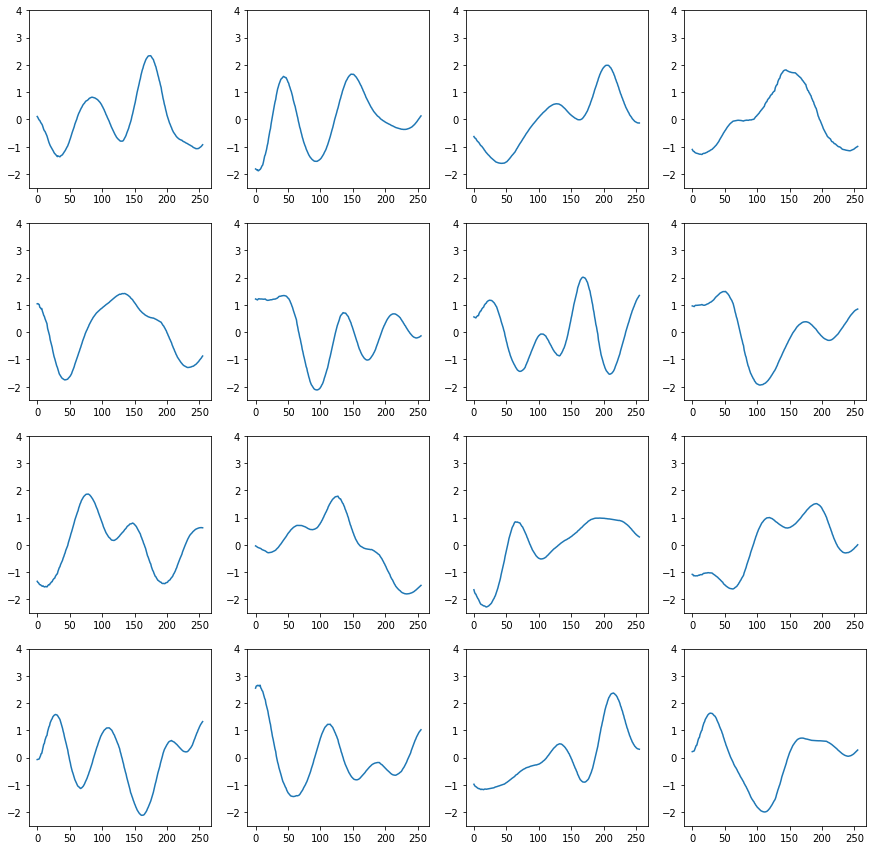

In [5]:
plt.gcf().set_size_inches(15,15)
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.ylim(-2.5, 4)
    #plt.tick_params(axis='both',which='both', bottom=False,top=False, left=False, labelleft=False, labelbottom=False)
    plt.plot(szeregi[i,:])

# Softdtw

### Wykres silhouette

In [7]:
reExpr=re.compile(r".*2\.0\.pickle")
reExprOdl=re.compile(r".*odl.*")

In [8]:
listaPasujacych=[]
for plik in os.listdir("../src/OutDir"):
    if reExpr.match(plik) is not None and reExprOdl.match(plik) is None:
        listaPasujacych.append(plik)

In [9]:
listaPasujacych

['1627758882.0182724-n_cluster-7-gamma-2.0.pickle',
 '1627757350.1235318-n_cluster-2-gamma-2.0.pickle',
 '1627759417.2953608-n_cluster-6-gamma-2.0.pickle',
 '1627757199.9208028-n_cluster-4-gamma-2.0.pickle',
 '1627756534.6941102-n_cluster-3-gamma-2.0.pickle',
 '1627759169.0694814-n_cluster-5-gamma-2.0.pickle']

In [10]:
listaSilhouetteScore=[None for i in range(6)]
for plik in listaPasujacych:
    with open(os.path.join("../src/OutDir/",plik), "rb") as file:
        model=pickle.load(file)
    etykiety=model.predict(szeregi)
    ocena=silhouette_score(odl, etykiety, metric="precomputed")
    listaSilhouetteScore[model.n_clusters-2]=ocena

/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dime

In [11]:
listaSilhouetteScore

[0.25824816262703193,
 0.23402697054027666,
 0.2042691550081344,
 0.19134659387213207,
 0.1888711591973867,
 0.17971228246435925]

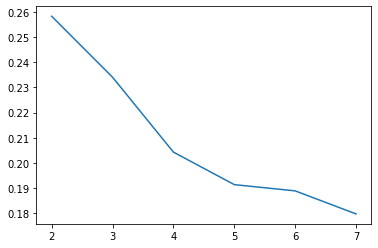

In [12]:
plt.plot(range(2,8), listaSilhouetteScore)

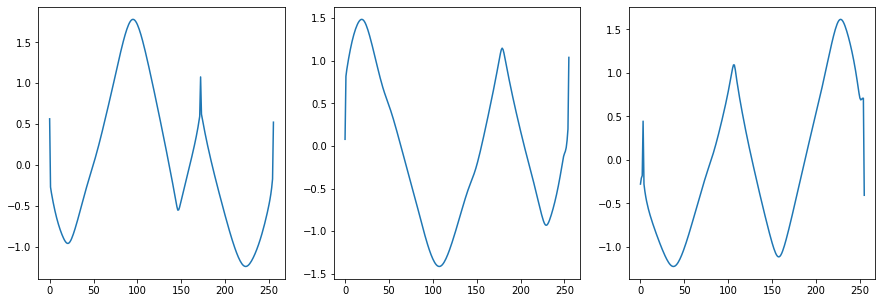

In [13]:
with open(os.path.join("../src/OutDir/",'1627756534.6941102-n_cluster-3-gamma-2.0.pickle'), "rb") as file:
        model=pickle.load(file)
plt.gcf().set_size_inches(15,5)
for i in range(3):
    plt.subplot(1,3,i+1)
    #plt.ylim(0.015, 0.030)
    plt.plot(model.cluster_centers_[i].ravel())

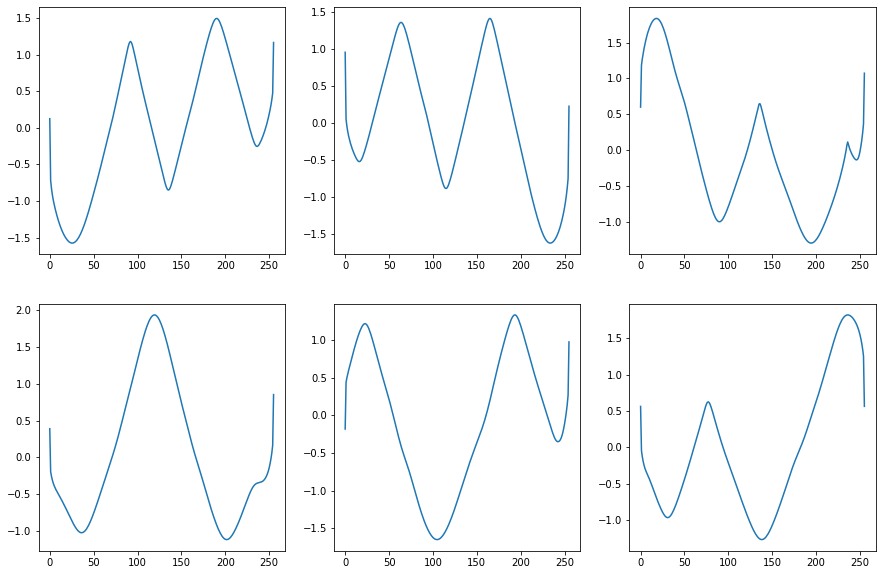

In [36]:
with open(os.path.join("../src/OutDir/",'1627759417.2953608-n_cluster-6-gamma-2.0.pickle'), "rb") as file:
        model=pickle.load(file)
plt.gcf().set_size_inches(15,10)
for i in range(6):
    plt.subplot(2,3,i+1)
    #plt.ylim(0.015, 0.035)
    plt.plot(model.cluster_centers_[i].ravel())

In [37]:
etykiety=model.predict(szeregi)

/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [38]:
np.unique(etykiety, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([676, 638, 628, 845, 680, 614]))

In [41]:
np.array(szeregiNazwy)[etykiety==k][2]

'lcl|NC_000913.3_cds_NP_414560.1_19 [gene=nhaA] [locus_tag=b0019] [db_xref=UniProtKB/Swiss-Prot:P13738] [protein=Na(+):H(+) antiporter NhaA] [protein_id=NP_414560.1] [location=17489..18655] [gbkey=CDS]'

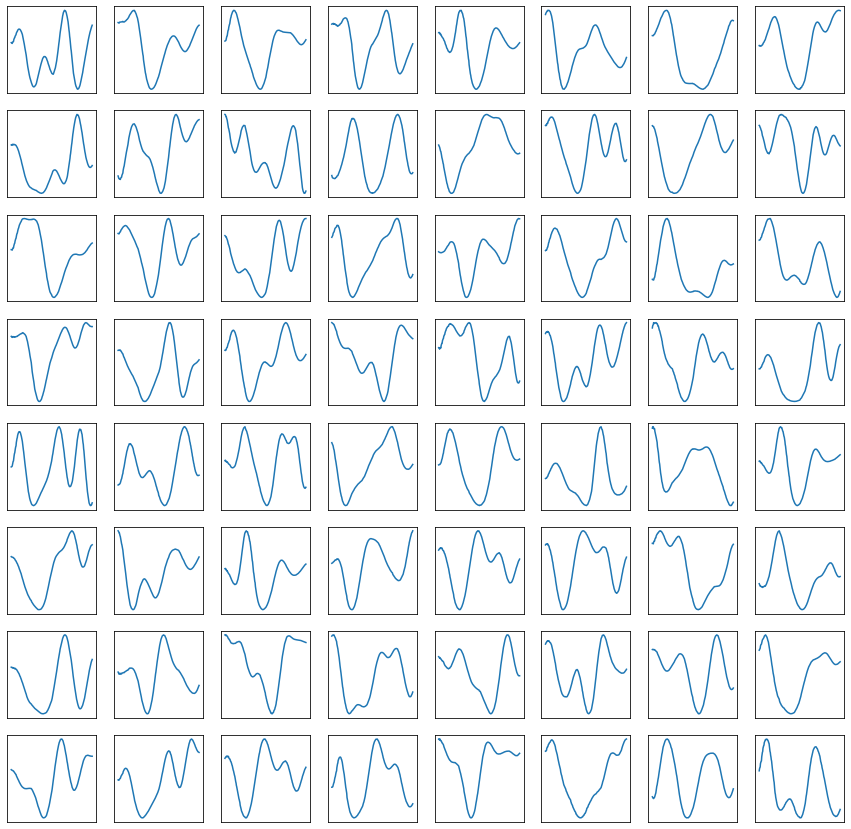

In [39]:
k=4
plt.gcf().set_size_inches(15,15)
szeregiWKtejGrupie=szeregi[etykiety==k,:]
for i in range(64):
    plt.subplot(8,8,i+1)
    #plt.ylim(0.005, 0.045)
    plt.tick_params(axis='both',which='both', bottom=False,top=False, left=False, labelleft=False, labelbottom=False)
    plt.plot(szeregiWKtejGrupie[i])

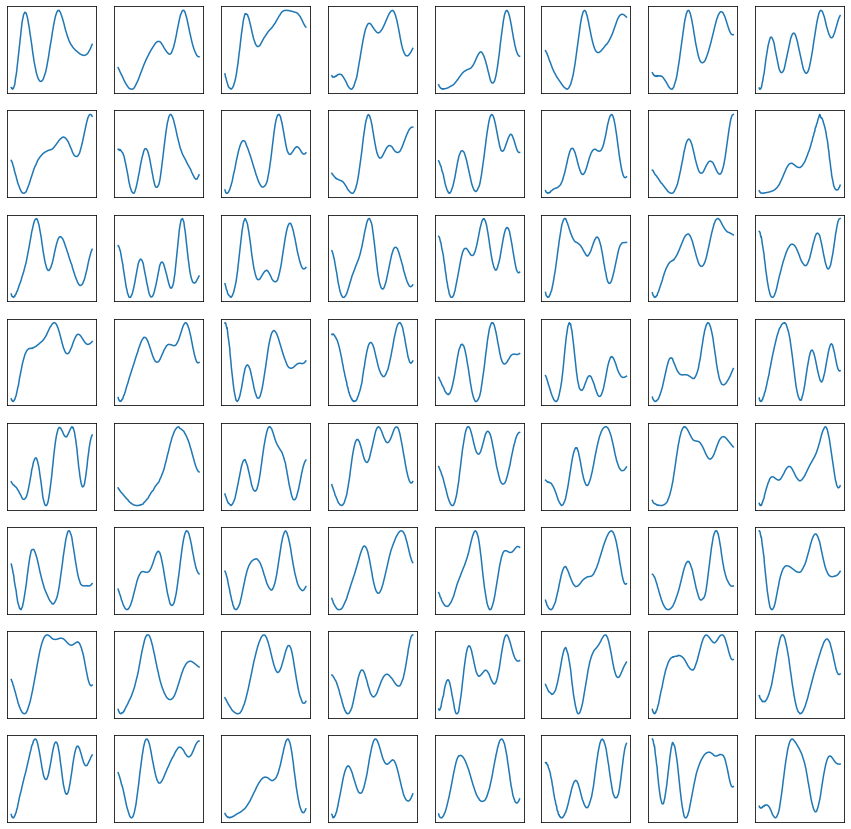

In [18]:
k=0
plt.gcf().set_size_inches(15,15)
szeregiWKtejGrupie=szeregi[etykiety==k,:]
for i in range(64):
    plt.subplot(8,8,i+1)
    #plt.ylim(0.005, 0.045)
    plt.tick_params(axis='both',which='both', bottom=False,top=False, left=False, labelleft=False, labelbottom=False)
    plt.plot(szeregiWKtejGrupie[i])

### KMeans 

In [19]:
kmeansSilList=[]
for i in range(2,8):
    kmeans=KMeans(i)
    predictKMeans=kmeans.fit_predict(szeregi)
    ocena=silhouette_score(odl, predictKMeans, metric="precomputed")
    kmeansSilList.append(ocena)
kmeansSilList

[0.27315950218118207,
 0.21717299544267712,
 0.18621226026376617,
 0.14833249327586617,
 0.11944628274522893,
 0.12439280481567253]

In [20]:
rozniceSil=np.array(listaSilhouetteScore)-np.array(kmeansSilList)
rozniceSil

array([-0.01491,  0.01685,  0.01806,  0.04301,  0.06942,  0.05532])

# Analiza

In [21]:
model.n_clusters

6

In [22]:
with open(os.path.join(outDir,"katalogFunkcjonalnosciGenow.pickle"), "rb") as plik:
    slownikFunGenow=pickle.load(plik)
with open(os.path.join(KatalogPickli,"Ecola-wygladzone-ustandaryzowane.pickle-paths"), "rb") as plik:
    szeregiNazwy=pickle.load(plik)

In [23]:
def zrobStatystykeWystapienGrupFunkcjonalnych(model, etykiety, szeregi, szeregiNazwy):
    wystapieniaLiter={}
    bledneNazwy=[]
    for k in range(model.n_clusters):
        maskaWyboru=(etykiety==k)
        wybraneNazwy=np.array(szeregiNazwy)[maskaWyboru]
        for nazwa in wybraneNazwy:
            if nazwa not in slownikFunGenow:
                bledneNazwy.append(nazwa)
                litera="XX"
            else:
                litera=slownikFunGenow[nazwa]
            if litera not in wystapieniaLiter:
                wystapieniaLiter[litera]=dict([(i,0) for i in range(model.n_clusters)])
            wystapieniaLiter[litera][k]+=1
    print(f"Liczba błędnych nazw: {len(bledneNazwy)}")
    return wystapieniaLiter, bledneNazwy

In [24]:
def rysujWykresySlupkoweDlaGrupFunkcjonalnych(wystapieniaLiter, etykiety, normalizacja=False):
    plt.gcf().set_size_inches(15,10)
    i=0
    L=list(wystapieniaLiter.items())
    L.sort()
    wystapieniaLiter=dict(L)
    czestosc=np.unique(etykiety, return_counts=True)[1]
    for litera in wystapieniaLiter:
        i+=1
        elementy=np.array(list(wystapieniaLiter[litera].items()))
        plt.subplot(5,5,i)
        if normalizacja:
            plt.bar(elementy[:,0], elementy[:,1]/czestosc)
        else:
            plt.bar(elementy[:,0], elementy[:,1])
        plt.title(litera)
        plt.tick_params(axis='both',which='both', bottom=False,top=False, labelbottom=False)
    plt.show()

In [25]:
wystapieniaLiter, bledneNazwy=zrobStatystykeWystapienGrupFunkcjonalnych(model, etykiety, szeregi, szeregiNazwy)

Liczba błędnych nazw: 387


In [26]:
bledneNazwy[0]

'lcl|NC_000913.3_cds_YP_009518733.1_12 [gene=mbiA] [locus_tag=b0012] [db_xref=UniProtKB/Swiss-Prot:P28697] [protein=uncharacterized protein MbiA] [protein_id=YP_009518733.1] [location=10830..11315] [gbkey=CDS]'

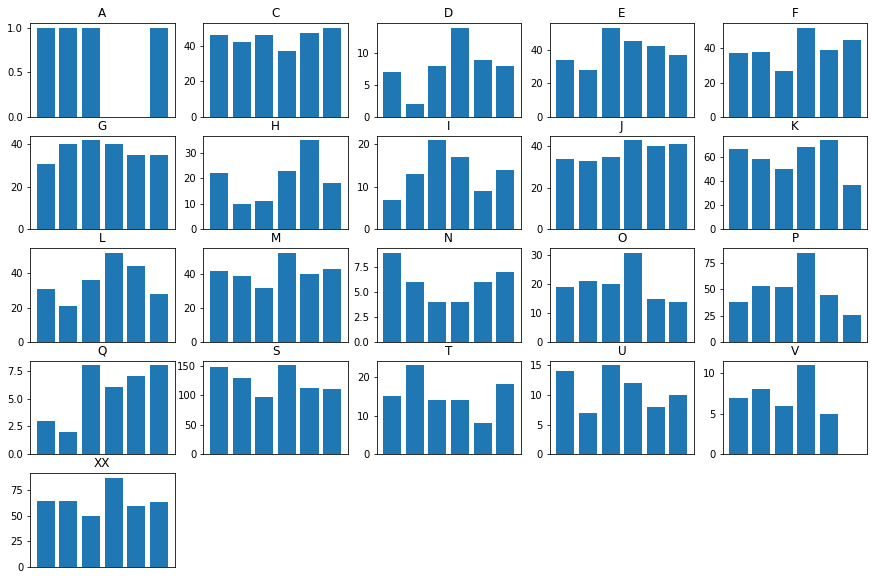

In [27]:
rysujWykresySlupkoweDlaGrupFunkcjonalnych(wystapieniaLiter, etykiety)

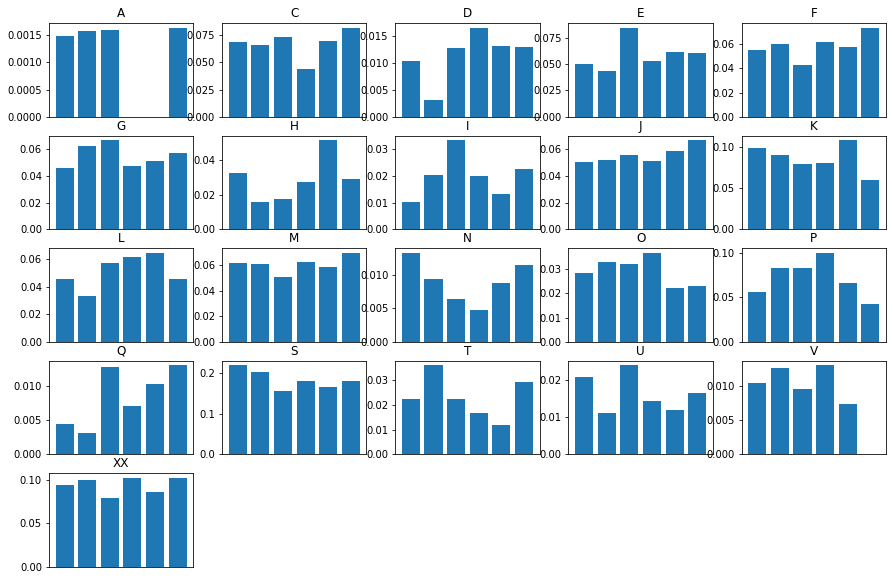

In [28]:
rysujWykresySlupkoweDlaGrupFunkcjonalnych(wystapieniaLiter, etykiety, True)

## 3 grupy

In [29]:
with open(os.path.join("../src/OutDir/",'1627756534.6941102-n_cluster-3-gamma-2.0.pickle'), "rb") as file:
    model=pickle.load(file)

In [30]:
etykiety=model.predict(szeregi)

/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [31]:
np.unique(etykiety, return_counts=True)

(array([0, 1, 2]), array([1242, 1388, 1451]))

In [32]:
wystapieniaLiter, bledneNazwy=zrobStatystykeWystapienGrupFunkcjonalnych(model, etykiety, szeregi, szeregiNazwy)

Liczba błędnych nazw: 387


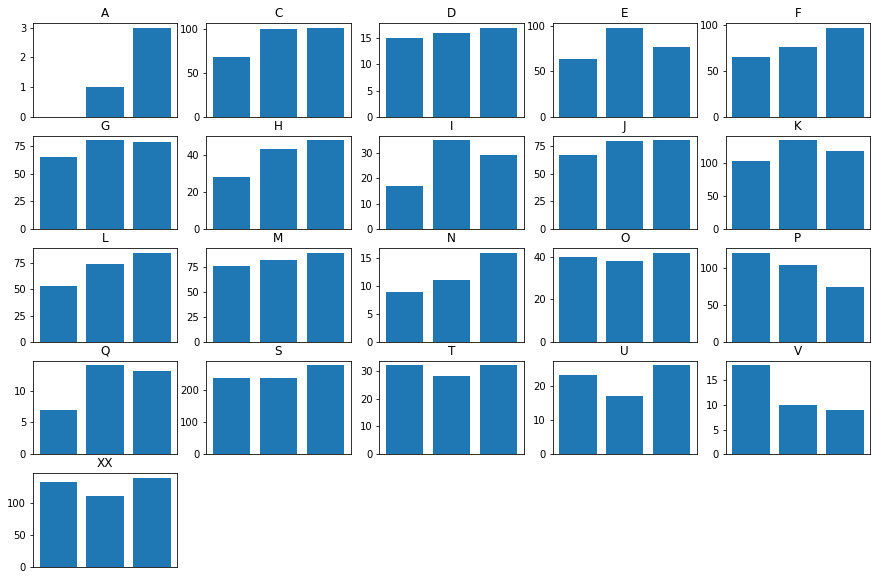

In [33]:
rysujWykresySlupkoweDlaGrupFunkcjonalnych(wystapieniaLiter, etykiety)

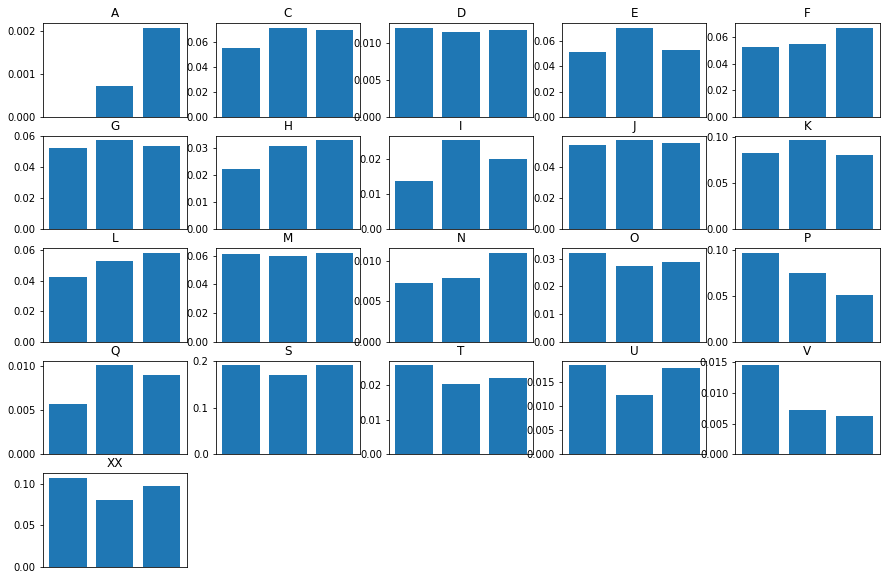

In [34]:
rysujWykresySlupkoweDlaGrupFunkcjonalnych(wystapieniaLiter,etykiety, normalizacja=True)